In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

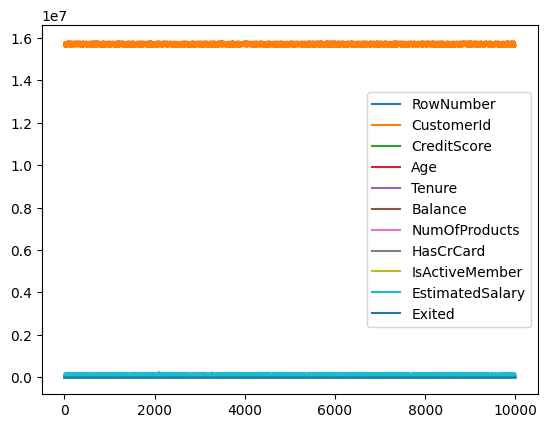

In [6]:
data.plot()

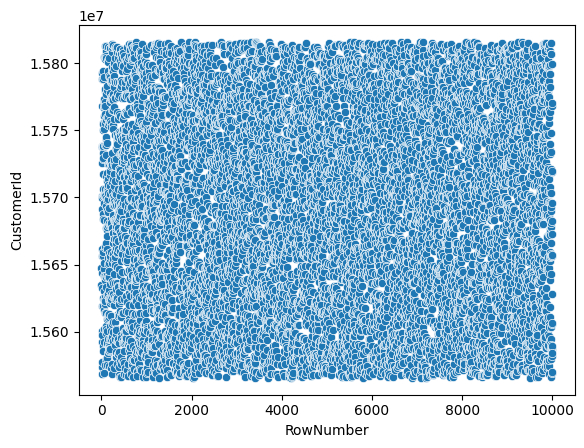

In [9]:
sns.scatterplot(x='RowNumber' , y='CustomerId',data=data)
plt.show()

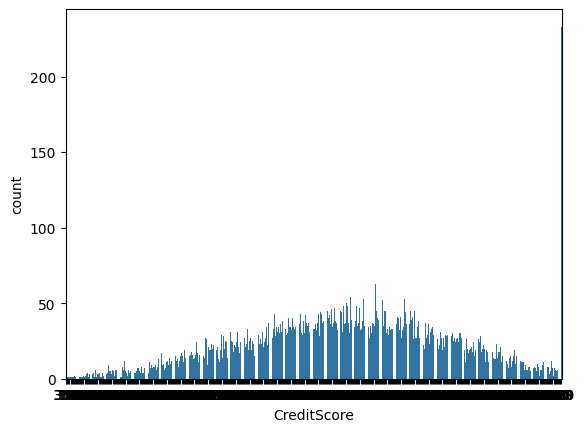

In [10]:
sns.countplot(x='CreditScore', data=data)
plt.show()

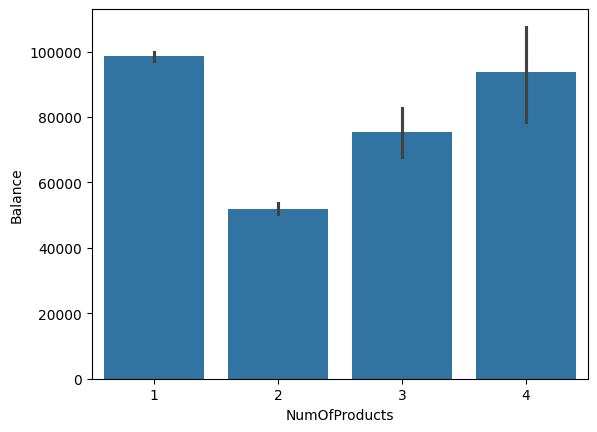

In [11]:
sns.barplot(x='NumOfProducts', y='Balance', data=data)
plt.show()


In [12]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [13]:
!pip install imblearn

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print( X_train.shape)
print( X_test.shape)

(9000, 13)
(1000, 13)


In [24]:
data1 = pd.get_dummies(data,drop_first = True)
data1.head()
data1 = data1.astype(int)
data1

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0,1,1,1,101348,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807,1,0,1,112542,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660,3,1,0,113931,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0,2,0,0,93826,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510,1,1,1,79084,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0,2,1,0,96270,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10,57369,1,1,1,101699,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7,0,1,0,1,42085,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3,75075,2,1,0,92888,...,0,0,0,0,0,0,0,1,0,1


In [26]:
data1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

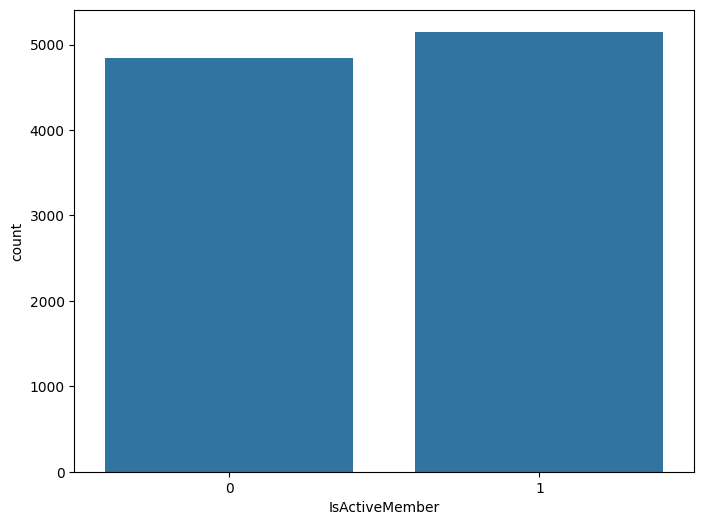

In [28]:
plt.figure(figsize =(8,6))
sns.countplot(x='IsActiveMember',data = data1)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train['Geography'] = label_encoder.fit_transform(X_train['Geography'])
X_test['Geography'] = label_encoder.transform(X_test['Geography'])


In [34]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4896,4897,15640464,Parkes,212,0,Male,41,5,91612.91,1,1,1,28427.84
4782,4783,15722611,Cameron,359,0,Female,53,8,114233.18,1,1,1,51587.04
1496,1497,15799156,Okwuadigbo,176,2,Male,38,8,0.00,2,0,0,79618.79
1957,1958,15674922,Beavers,317,0,Male,54,6,171137.62,1,1,1,167023.95
9171,9172,15660475,Ndubueze,19,0,Female,54,9,0.00,1,0,1,76621.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,15596647,Henderson,375,0,Male,54,8,69712.74,1,1,1,69381.05
5191,5192,15681075,Chukwualuka,289,0,Female,58,1,0.00,1,1,1,706.50
5390,5391,15573851,Macrossan,342,0,Female,38,1,0.00,3,0,0,92220.12
860,861,15807663,McGregor,274,0,Male,43,8,190227.46,1,1,0,97508.04


In [37]:
X_train_encoded = pd.get_dummies(X_train)

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_encoded, y_train)


LogisticRegression()

In [39]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_train_encoded, y_train)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.7948888888888889


In [41]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
svm_classifier = svm.SVC()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
svm_classifier.fit(X_train_scaled, y_train)


SVC()

In [47]:

y_train_pred = svm_classifier.predict(X_train_scaled)
accuracy_train = svm_classifier.score(X_train_scaled, y_train)
print( accuracy_train)


0.835
